In [1]:
import pandas as pd
import re
import ast
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from tabulate import tabulate
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('processed_recipe_dataset.csv')

In [3]:
df.shape

(229636, 21)

In [4]:
df['ingredients'] = df['ingredients'].apply(ast.literal_eval)
df['diet_type'] = df['diet_type'].apply(ast.literal_eval)
df['cuisine'] = df['cuisine'].apply(ast.literal_eval)

In [5]:
# Exploratory Data Analysis

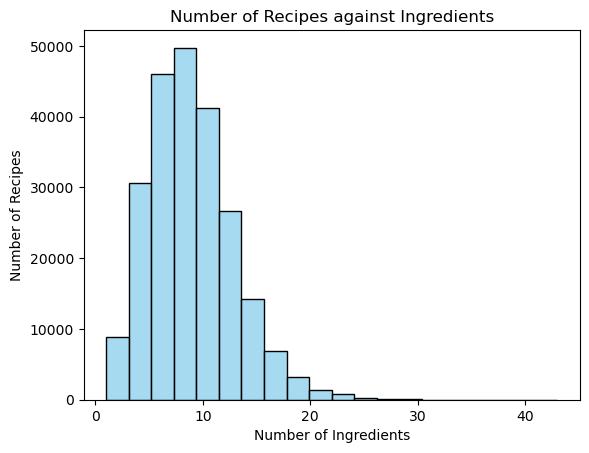

In [6]:
sns.histplot(df['n_ingredients'], bins=20, kde=False, color='skyblue', edgecolor='black')
plt.xlabel('Number of Ingredients')
plt.ylabel('Number of Recipes')
plt.title('Number of Recipes against Ingredients')
plt.show()

In [7]:
## Cleaning the ingredients columns

In [8]:
# remove characters - dashes, numbers, percentage signs
# no point in writing oil, salt, pepper -> check the list of most common ingredients
# optional - 'and' in ingreditents - split into 2 

In [9]:
def process_ingredients1(ingredient_list):
    l = []
    for item in ingredient_list:
        item = item.lower()
        item = re.sub(r'\d+', '', item)
        item = re.sub(r'[^\w\s]', '', item)
        item = re.sub(r'\s+', ' ', item).strip()
        l.append(item)
    return l

In [10]:
df['ingredients'] = df['ingredients'].apply(lambda x:process_ingredients1(x))

In [11]:
# looking for common ingreditents
vocabulary = nltk.FreqDist()
for ingredients in df['ingredients']:
    vocabulary.update(ingredients)
for word, frequency in vocabulary.most_common(200):
    print(f'{word};{frequency}')


salt;85090
butter;54741
sugar;43974
onion;38817
water;34461
eggs;33552
olive oil;32585
flour;26134
milk;25685
garlic cloves;25475
pepper;22200
brown sugar;18453
garlic;17878
allpurpose flour;17557
baking powder;17439
egg;17244
salt and pepper;15335
parmesan cheese;14764
lemon juice;14088
baking soda;14036
vegetable oil;13795
vanilla;13230
black pepper;12954
cinnamon;12485
tomatoes;11896
sour cream;11698
garlic powder;10765
vanilla extract;10201
oil;9858
honey;9778
cream cheese;9745
onions;9734
garlic clove;9694
celery;9456
cheddar cheese;9006
unsalted butter;8845
soy sauce;8715
mayonnaise;8670
chicken broth;7945
paprika;7894
worcestershire sauce;7737
extra virgin olive oil;7658
fresh parsley;7615
cornstarch;7451
fresh ground black pepper;7090
parsley;6967
carrots;6957
chili powder;6922
bacon;6908
ground cinnamon;6814
carrot;6658
potatoes;6471
nutmeg;6251
cayenne pepper;6198
granulated sugar;6170
ground cumin;6120
ground beef;5809
green onions;5780
red onion;5751
walnuts;5721
pecans;572

In [12]:
## Ingredients to be removed - Staples 

# salt 
# butter
# sugar 
# water
# pepper
# black pepper
# salt and pepper
# olive oil 
# vegetable oil 
# oil 
# extra virgin olive oil 
# fresh ground black pepper
# granulated sugar
# powdered sugar
# kosher salt
# white sugar
# brown sugar
# confectioners sugar
# sea salt
# light brown sugar
# boiling water
# cold water
# hot water

## Words to be replaced (Adjectives)

# fresh
# unsalted
# ground
# dried
# dry
# cooked
# sliced
# boneless 
# breasts
# skinless
# semisweet
# sharp

In [13]:
def process_ingredients2(ingredient_list):
    l = []
    for item in ingredient_list:
        item = re.sub(r'fresh', '', item)
        item = re.sub(r'unsalted', '', item)
        item = re.sub(r'ground', '', item)
        item = re.sub(r'dried', '', item)
        item = re.sub(r'dry', '', item)
        item = re.sub(r'cooked', '', item)
        item = re.sub(r'boneless', '', item)
        item = re.sub(r'sliced', '', item)
        item = re.sub(r'breasts', '', item)
        item = re.sub(r'breast', '', item)
        item = re.sub(r'skinless', '', item)
        item = re.sub(r'semisweet', '', item)
        item = re.sub(r'sharp', '', item)
        item = re.sub(r'frozen', '', item)
        item = re.sub(r'crushed', '', item)
        item = re.sub(r'pure', '', item)
        item = re.sub(r'allpurpose', '', item)
        item = re.sub(r'lean', '', item)
        item = re.sub(r'halves', '', item)
        item = re.sub(r'diced', '', item)
        item = re.sub(r'\s+', ' ', item).strip()
        l.append(item)
    return l

In [14]:
ingredients_to_remove = ['salt','butter','sugar','water','pepper','black pepper','salt and pepper','olive oil', 'vegetable oil', 'oil', 
'extra virgin olive oil', 'fresh ground black pepper','granulated sugar','powdered sugar','kosher salt',
'white sugar','brown sugar','confectioners sugar','sea salt','light brown sugar','boiling water','cold water',
'hot water','salt ly black pepper','ice','cooking oil','warm water']

def process_ingredients3(ingredient_list):
    l = [item for item in ingredient_list if item not in ingredients_to_remove]
    return l


In [15]:
df['ingredients'] = df['ingredients'].apply(lambda x:process_ingredients2(x))
df['ingredients'] = df['ingredients'].apply(lambda x:process_ingredients3(x))

In [16]:
# looking for common ingreditents
vocabulary2 = nltk.FreqDist()
for ingredients in df['ingredients']:
    vocabulary2.update(ingredients)
for word, frequency in vocabulary2.most_common(200):
    print(f'{word};{frequency}')


flour;43691
onion;39562
eggs;33552
milk;25858
garlic cloves;25823
lemon juice;19361
cinnamon;19299
garlic;18852
chicken;17721
baking powder;17439
egg;17244
tomatoes;16906
parsley;15844
parmesan cheese;15198
baking soda;14036
vanilla;13230
sour cream;11698
vanilla extract;11597
cheddar cheese;11487
ginger;11438
garlic powder;10765
cumin;10317
oregano;10152
onions;9852
garlic clove;9786
honey;9778
cream cheese;9745
basil;9680
celery;9456
beef;9408
nutmeg;9244
thyme;8797
soy sauce;8715
mayonnaise;8670
cilantro;8223
paprika;7984
chicken broth;7945
worcestershire sauce;7737
bacon;7538
cornstarch;7451
carrots;7045
chili powder;6922
carrot;6705
mushrooms;6690
cayenne pepper;6617
potatoes;6475
lime juice;6046
white wine;5970
walnuts;5801
green onions;5780
pecans;5774
red onion;5751
red pepper flakes;5676
dijon mustard;5550
green onion;5546
orange juice;5447
mozzarella cheese;5283
heavy cream;5162
margarine;5095
chocolate chips;4826
zucchini;4615
mustard;4609
raisins;4436
red bell pepper;4422
t

In [17]:
df['ingredients_combined'] = df['ingredients'].apply(lambda x: ' '.join(x))

In [18]:
df['n_ingredients'] = df['ingredients'].apply(lambda x: len(x))

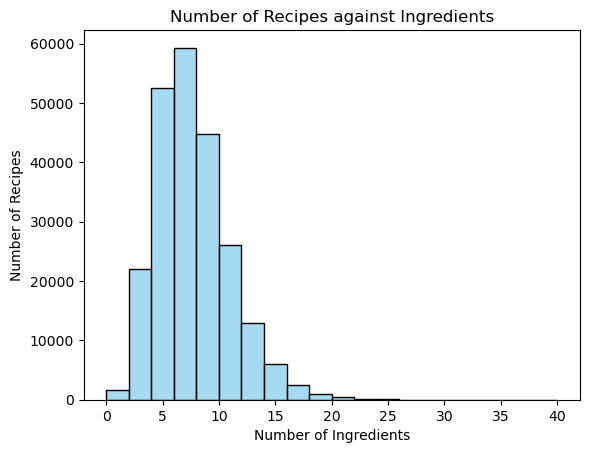

In [19]:
sns.histplot(df['n_ingredients'], bins=20, kde=False, color='skyblue', edgecolor='black')
plt.xlabel('Number of Ingredients')
plt.ylabel('Number of Recipes')
plt.title('Number of Recipes against Ingredients')
plt.show()

In [20]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def process_ingredients4(ingredients_str):
    l = ingredients_str.split()
    l = [lemmatizer.lemmatize(item) for item in l]
    l = [item for item in l if item not in stop_words]
    return ' '.join(l)

In [21]:
df['ingredients_combined'] = df['ingredients_combined'].apply(lambda x: process_ingredients4(x))

In [22]:
## Merging with Recipe Rating Dataset

In [23]:
df_rating = pd.read_csv('RAW_interactions.csv')
df_rating.head()

,user_id,recipe_id,date,rating,review
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall..."
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin..."


In [24]:
dummy_ratings = pd.get_dummies(df_rating['rating'], prefix='rating')
df_rating = pd.concat([df_rating, dummy_ratings], axis=1)

df_rating.head()

,user_id,recipe_id,date,rating,review,rating_0,rating_1,rating_2,rating_3,rating_4,rating_5
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...,0,0,0,0,1,0
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall...",0,0,0,0,0,1
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...,0,0,0,0,1,0
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...,0,0,0,0,0,1
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin...",0,0,0,0,0,1


In [25]:
df_rating_recipe = df_rating.groupby("recipe_id")["rating_1","rating_2","rating_3","rating_4","rating_5"].sum().reset_index()
df_rating_recipe.head()

/var/folders/b2/_rsr8jz9725c59b382lk9jsr0000gn/T/ipykernel_8672/3542657610.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_rating_recipe = df_rating.groupby("recipe_id")["rating_1","rating_2","rating_3","rating_4","rating_5"].sum().reset_index()


,recipe_id,rating_1,rating_2,rating_3,rating_4,rating_5
0,38,0,0,0,3,1
1,39,0,0,1,0,0
2,40,1,0,0,2,6
3,41,0,0,0,1,1
4,43,1,0,0,0,0


In [26]:
df_rating_recipe['num_rating'] = df_rating_recipe['rating_1'] + df_rating_recipe['rating_2'] + df_rating_recipe['rating_3']+ df_rating_recipe['rating_4'] + df_rating_recipe['rating_5']

In [27]:
df_rating_recipe['num_rating'].describe()

count    231637.000000
mean          4.625859
std          16.415246
min           0.000000
25%           1.000000
50%           2.000000
75%           4.000000
max        1496.000000
Name: num_rating, dtype: float64

In [28]:
df_merged = df.merge(df_rating_recipe, how="left",on="recipe_id")

In [29]:
rating_summary = df_merged.groupby('num_rating')['recipe_id'].count().to_frame("count").reset_index()

In [30]:
rating_summary.head(10)

,num_rating,count
0,0,4959
1,1,90835
2,2,44072
3,3,24204
4,4,14932
5,5,10308
6,6,7438
7,7,5576
8,8,4055
9,9,3344


In [31]:
## Filtering the dataset for removal of bad recipes with less ingredients, 0 and 1 ratings
#### Remove recipes with no ratings (num_rating = 0)
#### Remove recipes with less than 3 ingredients
#### Remove recipes with single ratings (num_rating = 1)

In [32]:
df_merged.drop(columns = ['rating'], inplace = True)

In [33]:
df_merged = df_merged[df_merged['num_rating']!= 0]
df_merged = df_merged[df_merged['n_ingredients'] > 3]

In [34]:
df_merged.head()

,name,recipe_id,minutes,nutrition,n_steps,steps,ingredients,n_ingredients,cuisine,diet_type,...,protein,saturated fat,carbohydrates,ingredients_combined,rating_1,rating_2,rating_3,rating_4,rating_5,num_rating
0,arriba baked winter squash mexican style,137739,55,"[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...","[winter squash, mexican seasoning, mixed spice...",4,"[American, Caribbean/Latin American]",[Vegetarian],...,2.0,0.0,4.0,winter squash mexican seasoning mixed spice honey,0,0,0,0,3,3
1,a bit different breakfast pizza,31490,30,"[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...","[prepared pizza crust, sausage patty, eggs, mi...",5,"[American, American, American]",[],...,22.0,35.0,1.0,prepared pizza crust sausage patty egg milk ch...,0,0,0,1,2,3
2,all in the kitchen chili,112140,130,"[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...","[beef, yellow onions, tomatoes, tomato paste, ...",11,[],[],...,39.0,27.0,5.0,beef yellow onion tomato tomato paste tomato s...,0,0,0,1,0,1
3,alouette potatoes,59389,45,"[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"[spreadable cheese with garlic and herbs, new ...",8,[],[],...,14.0,8.0,20.0,spreadable cheese garlic herb new potato shall...,0,0,0,1,1,2
4,amish tomato ketchup for canning,44061,190,"[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,"[tomato juice, apple cider vinegar, clove oil,...",5,"[American, American, American, American]",[Vegetarian],...,3.0,0.0,28.0,tomato juice apple cider vinegar clove oil cin...,0,0,0,0,1,1


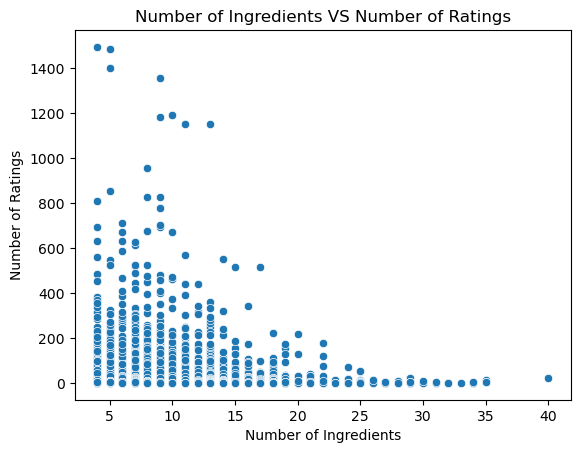

In [35]:
sns.scatterplot(data=df_merged, x='n_ingredients', y='num_rating')
plt.xlabel('Number of Ingredients')
plt.ylabel('Number of Ratings')
plt.title('Number of Ingredients VS Number of Ratings')
plt.show()

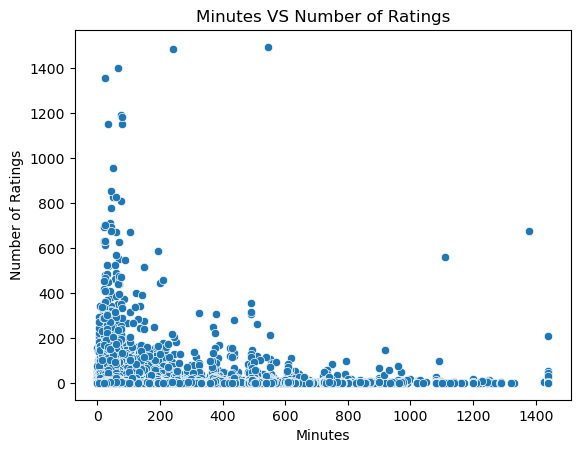

In [36]:
sns.scatterplot(data=df_merged, x='minutes', y='num_rating')
plt.xlabel('Minutes')
plt.ylabel('Number of Ratings')
plt.title('Minutes VS Number of Ratings')
plt.show()

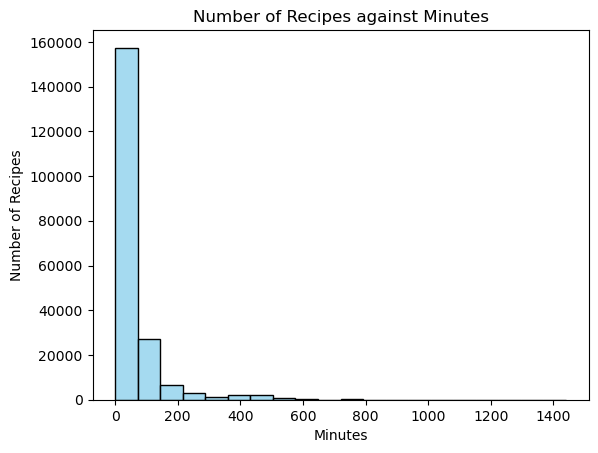

In [37]:
sns.histplot(df_merged['minutes'], bins=20, kde=False, color='skyblue', edgecolor='black')
plt.xlabel('Minutes')
plt.ylabel('Number of Recipes')
plt.title('Number of Recipes against Minutes')
plt.show()

In [38]:
df_new = df_merged[df_merged['num_rating']!=1]

In [39]:
df_new.shape

(119155, 27)

In [40]:
## Cleaning cuisine column

In [41]:
df_new = df_new.copy()
df_new['cuisine'] = df_new['cuisine'].apply(lambda x: list(set(x)))

In [42]:
combined_list = sum(df_new['cuisine'], [])
all_cuisines = list(set(combined_list))
all_cuisines

['African',
 'Asian',
 'Canadian',
 'Caribbean/Latin American',
 'Indian',
 'Australian',
 'Russian',
 'Middle Eastern',
 'European',
 'Chinese',
 'Oceanian',
 'American']

In [43]:
for cuisine in all_cuisines:
    col_name = 'cuisine_' + cuisine
    df_new[col_name] = df_new['cuisine'].apply(lambda x: 1 if cuisine in x else 0)

In [44]:
df_new = df_new.copy()
df_new['len_cuisine'] = df_new['cuisine'].apply(lambda x: len(x))

In [45]:
df_new.groupby("len_cuisine")["recipe_id"].count().to_frame("Count of Recipes").reset_index()

,len_cuisine,Count of Recipes
0,0,69563
1,1,35604
2,2,12957
3,3,867
4,4,125
5,5,32
6,6,3
7,7,3
8,8,1


In [46]:
## Cleaning diet_type column

In [47]:
all_diet_types = sum(df_new['diet_type'], [])
all_diet_types = list(set(all_diet_types))

In [48]:
all_diet_types

['Low Calorie',
 'High Calcium',
 'Kosher',
 'Dairy Free',
 'Special Nutrient Focus',
 'Low Protein',
 'Low Cholesterol',
 'Low Sodium',
 'High Fiber',
 'Lactose Free',
 'Healthy',
 'Gluten Free',
 'Low Fat',
 'High Protein',
 'Low Saturated Fat',
 'Diabetic Friendly',
 'Vegetarian',
 'Vegan',
 'Low Carb']

In [49]:
df_new['len_diet_type'] = df_new['diet_type'].apply(lambda x: len(x))

In [50]:
df_new.groupby("len_diet_type")["recipe_id"].count().to_frame("count_recipes").reset_index()

,len_diet_type,count_recipes
0,0,57913
1,1,11659
2,2,14147
3,3,8338
4,4,6660
5,5,4408
6,6,3689
7,7,3519
8,8,3272
9,9,2887


In [51]:
# df_no_diet_type = df_new[df_new['len_diet_type'] == 0]
# df_no_diet_type.head()

In [52]:
# ## exploring the most common ingredients in the dataset to identify non vegetarian keywords
# vocabulary3 = nltk.FreqDist()
# for ingredients in df_no_diet_type['ingredients']:
#     vocabulary3.update(ingredients)
# for word, frequency in vocabulary3.most_common(1000):
#     print(f'{word};{frequency}')


In [53]:
non_vegetarian_keywords = [
    "chicken",
    "egg",
    "bacon",
    "beef",
    "ham",
    "turkey",
    "shrimp",
    "sausage",
    "pork",
    "salami",
    "crabmeat",
    "prosciutto",
    "anchovy",
    "veal",
    "salmon",
    "tuna",
    "fish",
    "lamb",
    "steak",
]

In [54]:
for diet_type in all_diet_types:
    col_name = 'diet_type_' + diet_type
    df_new[col_name] = df_new['diet_type'].apply(lambda x: 1 if diet_type in x else 0)

In [55]:
df_new = df_new.copy()
df_new['diet_type_Vegetarian'] = df_new['ingredients_combined'].apply(lambda x: 1 if all(y not in non_vegetarian_keywords for y in x.split()) else 0)

In [56]:
df_new['diet_type_Non Vegetarian'] = 1 - df_new['diet_type_Vegetarian'] 

In [57]:
## Cleaning time to make column

In [58]:
def time_to_make_category(minutes):
    if minutes <= 15:
        return 'Within 15 minutes'
    elif minutes > 15 and minutes <= 30:
        return 'Within 30 minutes'
    elif minutes > 30 and minutes <= 60:
        return 'Within 1 hour'
    elif minutes > 60 and minutes <= 120:
        return 'Within 2 hours'
    elif minutes > 120 and minutes <= 180:
        return 'Within 3 hours'
    else:
        return 'More than 4 hours'
        

In [59]:
df_new['time_to_make'] = df_new['minutes'].apply(time_to_make_category)

In [60]:
df_new.rename(columns={'total fat' : 'total_fat',
                      'saturated fat' : 'saturated_fat',
                   'cuisine_Australian':'cuisine_australian', 
                    'cuisine_Canadian':'cuisine_canadian',
                    'cuisine_European':'cuisine_european', 
                    'cuisine_Chinese' :'cuisine_chinese',
                    'cuisine_Middle Eastern' : 'cuisine_middle_eastern',
                    'cuisine_American':'cuisine_american', 
                    'cuisine_African':'cuisine_african', 
                    'cuisine_Indian':'cuisine_indian',
                    'cuisine_Russian' : 'cuisine_russian', 
                    'cuisine_Asian' : 'cuisine_asian', 
                    'cuisine_Oceanian' : 'cuisine_oceanian',
                    'cuisine_Caribbean/Latin American' : 'cuisine_caribbean_latin _american' ,
                    'diet_type_Gluten Free' : 'diet_type_gluten_free', 
                    'diet_type_Lactose Free' : 'diet_type_lactose_free', 
                    'diet_type_Low Carb' : 'diet_type_low_carb',
                    'diet_type_Diabetic Friendly' : 'diet_type_diabetic_friendly', 
                    'diet_type_Vegan' : 'diet_type_vegan',
                    'diet_type_Vegetarian' : 'diet_type_vegetarian', 
                    'diet_type_Low Calorie' :'diet_type_low_calorie',
                    'diet_type_Low Protein' : 'diet_type_low_protein', 
                    'diet_type_High Fiber' : 'diet_type_high_fiber'  , 
                    'diet_type_Low Fat' : 'diet_type_low_fat',
                    'diet_type_High Calcium' : 'diet_type_high_calcium', 
                    'diet_type_Low Saturated Fat' : 'diet_type_low_saturated_fat',
                    'diet_type_Special Nutrient Focus' : 'diet_type_special_nutrient_focus' , 
                    'diet_type_High Protein' : 'diet_type_high_protein',
                    'diet_type_Dairy Free' : 'diet_type_diary_free' , 
                    'diet_type_Kosher' : 'diet_type_kosher', 
                    'diet_type_Healthy' : 'diet_type_healthy',
                    'diet_type_Low Cholesterol' : 'diet_type_low_cholesterol', 
                    'diet_type_Low Sodium' : 'diet_type_low_sodium',
                    'diet_type_Non Vegetarian' : 'diet_type_non_vegetarian' }, inplace = True)

In [61]:
df_new.columns

Index(['name', 'recipe_id', 'minutes', 'nutrition', 'n_steps', 'steps',
       'ingredients', 'n_ingredients', 'cuisine', 'diet_type', 'time_to_make',
       'minutes_category', 'steps_category', 'calories', 'total_fat', 'sugar',
       'sodium', 'protein', 'saturated_fat', 'carbohydrates',
       'ingredients_combined', 'rating_1', 'rating_2', 'rating_3', 'rating_4',
       'rating_5', 'num_rating', 'cuisine_african', 'cuisine_asian',
       'cuisine_canadian', 'cuisine_caribbean_latin _american',
       'cuisine_indian', 'cuisine_australian', 'cuisine_russian',
       'cuisine_middle_eastern', 'cuisine_european', 'cuisine_chinese',
       'cuisine_oceanian', 'cuisine_american', 'len_cuisine', 'len_diet_type',
       'diet_type_low_calorie', 'diet_type_high_calcium', 'diet_type_kosher',
       'diet_type_diary_free', 'diet_type_special_nutrient_focus',
       'diet_type_low_protein', 'diet_type_low_cholesterol',
       'diet_type_low_sodium', 'diet_type_high_fiber',
       'diet_type_

In [62]:
df_new.head()

,name,recipe_id,minutes,nutrition,n_steps,steps,ingredients,n_ingredients,cuisine,diet_type,...,diet_type_healthy,diet_type_gluten_free,diet_type_low_fat,diet_type_high_protein,diet_type_low_saturated_fat,diet_type_diabetic_friendly,diet_type_vegetarian,diet_type_vegan,diet_type_low_carb,diet_type_non_vegetarian
0,arriba baked winter squash mexican style,137739,55,"[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...","[winter squash, mexican seasoning, mixed spice...",4,"[Caribbean/Latin American, American]",[Vegetarian],...,0,0,0,0,0,0,1,0,0,0
1,a bit different breakfast pizza,31490,30,"[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...","[prepared pizza crust, sausage patty, eggs, mi...",5,[American],[],...,0,0,0,0,0,0,0,0,0,1
3,alouette potatoes,59389,45,"[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"[spreadable cheese with garlic and herbs, new ...",8,[],[],...,0,0,0,0,0,0,1,0,0,0
5,apple a day milk shake,5289,0,"[160.2, 10.0, 55.0, 3.0, 9.0, 20.0, 7.0]",4,"['combine ingredients in blender', 'cover and ...","[milk, vanilla ice cream, apple juice concentr...",4,[American],"[Low Protein, Low Sodium, Low Calorie, Special...",...,0,0,0,0,0,0,1,0,0,0
8,bananas 4 ice cream pie,70971,180,"[4270.8, 254.0, 1306.0, 111.0, 127.0, 431.0, 2...",8,"['crumble cookies into a 9-inch pie plate , or...","[chocolate sandwich style cookies, chocolate s...",6,[],[],...,0,0,0,0,0,0,1,0,0,0


In [63]:
df_new.drop(columns =['nutrition','diet_type','len_cuisine','len_diet_type'], inplace = True)

In [64]:
# df_new.to_csv('final_dataset.csv', index = False)

In [66]:
df_new['ingredients'] = df_new['ingredients'].apply(lambda x: ', '.join(x))

In [69]:
df_new['ingredients'] = df_new['ingredients'].apply(lambda x: x.capitalize())

In [70]:
df_new['steps'] = df_new['steps'].apply(ast.literal_eval)

In [71]:
def format_steps(steps):
    formatted_steps = ""
    for i, step in enumerate(steps, start=1):
         formatted_steps += f"<p>{i}. {step.strip().capitalize()}.</p>"  # Wrap each step in <p> tags
    return formatted_steps.rstrip()

In [72]:
df_new['steps'] = df_new['steps'].apply(format_steps)

In [73]:
df_new['steps']

0         <p>1. Make a choice and proceed with recipe.</...
1         <p>1. Preheat oven to 425 degrees f.</p><p>2. ...
3         <p>1. Place potatoes in a large pot of lightly...
5         <p>1. Combine ingredients in blender.</p><p>2....
8         <p>1. Crumble cookies into a 9-inch pie plate ...
                                ...                        
229628    <p>1. Place the lettuce on a platter or servin...
229629    <p>1. To make the sauce , combine the mayonnai...
229631    <p>1. Heat oil in a 4-quart dutch oven.</p><p>...
229633    <p>1. In a bowl , combine the mashed yolks and...
229635    <p>1. Whip sugar and shortening in a large bow...
Name: steps, Length: 119155, dtype: object